In [78]:
import pandas as pd
import numpy as np
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score


In [2]:


df_temp_out = pd.read_csv('outdoor_temperature.csv')  
df_temp_in = pd.read_csv('indoor_temperature.csv')  
df_heat = pd.read_csv('heating_consumption.csv')  

num_columns = df_temp_out.shape[1]
new_column_names = [f"Heure_{i+1}" for i in range(num_columns)] 
df_temp_out.columns = new_column_names
df_temp_in.columns = new_column_names
df_heat.columns = new_column_names


df_combined = pd.DataFrame()


for col in df_temp_out.columns:
    df_combined[col] = [
        list(zip(
            [df_temp_out[col][i]], 
            [df_temp_in[col][i]],
            [df_heat[col][i]]
        )) 
        for i in range(len(df_temp_out))
    ]

date_range = pd.date_range(start='2021-01-01', end='2022-12-28', freq='D')
df_combined['date'] = date_range
print(df_combined)


                   Heure_1                Heure_2                Heure_3  \
0    [(0.9, 18.5909, 0.0)]  [(1.4, 18.5636, 0.0)]  [(1.6, 18.4273, 0.0)]   
1    [(0.8, 17.9545, 0.0)]  [(0.9, 17.8727, 0.0)]  [(0.9, 17.6727, 0.0)]   
2    [(0.5, 18.0818, 0.0)]  [(0.2, 18.1364, 0.0)]  [(0.1, 18.0727, 0.0)]   
3    [(1.9, 19.3364, 0.0)]  [(1.7, 19.2727, 0.0)]  [(1.3, 19.2727, 0.0)]   
4    [(1.4, 19.2273, 0.0)]  [(1.5, 19.3091, 0.0)]  [(1.5, 19.3545, 0.0)]   
..                     ...                    ...                    ...   
722    [(7.1, 20.92, 0.0)]    [(7.2, 20.89, 0.0)]    [(7.6, 20.86, 0.0)]   
723    [(8.1, 21.38, 0.0)]    [(7.8, 21.35, 0.0)]    [(6.9, 21.34, 0.0)]   
724   [(10.9, 20.95, 0.0)]   [(11.0, 20.92, 0.0)]   [(10.7, 20.85, 0.0)]   
725    [(6.5, 20.34, 0.0)]    [(6.9, 20.22, 0.0)]    [(6.3, 20.15, 0.0)]   
726    [(9.3, 20.38, 0.0)]    [(8.9, 20.44, 0.0)]    [(8.7, 20.46, 0.0)]   

                   Heure_4                Heure_5                   Heure_6  \
0    [(0

In [17]:
df_heating = df_combined[df_combined.apply(lambda row: sum([val[2] for col in df_temp_out.columns for val in row[col] if val[2] != 0]), axis=1) != 0]
df_heating = df_heating.reset_index(drop=True)

print(df_heating)

                    Heure_1                 Heure_2                 Heure_3  \
0     [(0.5, 18.0818, 0.0)]   [(0.2, 18.1364, 0.0)]   [(0.1, 18.0727, 0.0)]   
1     [(1.9, 19.3364, 0.0)]   [(1.7, 19.2727, 0.0)]   [(1.3, 19.2727, 0.0)]   
2     [(1.4, 19.2273, 0.0)]   [(1.5, 19.3091, 0.0)]   [(1.5, 19.3545, 0.0)]   
3    [(-3.0, 18.8545, 0.0)]  [(-3.0, 18.7091, 0.0)]  [(-3.4, 18.6273, 0.0)]   
4    [(-3.6, 18.7091, 0.0)]     [(-4.2, 18.6, 0.0)]  [(-3.8, 18.5455, 0.0)]   
..                      ...                     ...                     ...   
240    [(12.1, 19.51, 0.0)]    [(12.1, 19.84, 0.0)]    [(12.3, 19.97, 0.0)]   
241    [(12.6, 20.93, 0.0)]    [(12.2, 20.89, 0.0)]    [(12.0, 20.91, 0.0)]   
242    [(12.3, 21.22, 0.0)]    [(11.9, 21.19, 0.0)]    [(11.9, 21.17, 0.0)]   
243    [(10.8, 21.54, 0.0)]    [(10.6, 21.48, 0.0)]    [(11.1, 21.48, 0.0)]   
244    [(12.2, 22.11, 0.0)]    [(10.8, 21.98, 0.0)]     [(10.6, 21.9, 0.0)]   

                    Heure_4                 Heure_5

In [18]:
heating_indices = df_heating.index
#print(heating_indices)
df_temp_out_heating = df_temp_out.iloc[heating_indices]
df_temp_in_heating = df_temp_in.iloc[heating_indices]
df_heat_heating = df_heat.iloc[heating_indices]

#print(df_temp_out_heating)
#print(df_temp_in_heating)
#print(df_heat_heating)

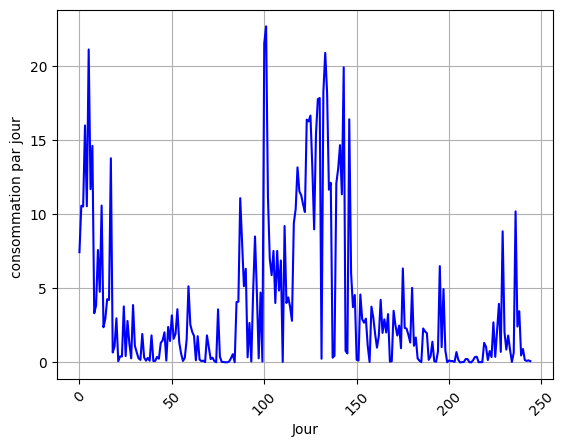

In [24]:

third_values = df_heating.apply(
    lambda row: [val[2] for col in df_heat_heating.columns for val in row[col] if val[2] != 0], axis=1)

sums = third_values.apply(lambda x: sum(x))

plt.plot(df_heating.index, sums, linestyle='-', color='b')
plt.xlabel('Jour')
plt.ylabel('consommation par jour ')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


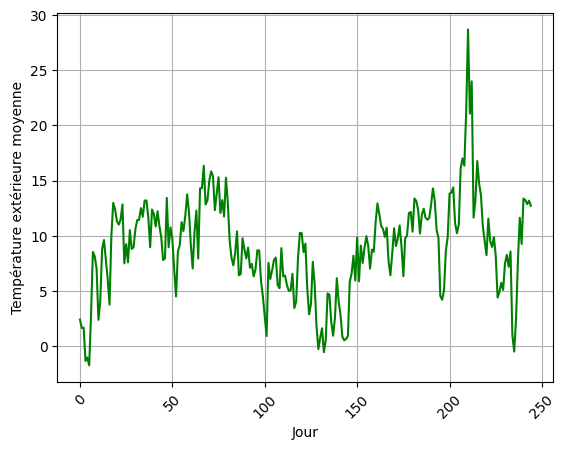

In [26]:
values_external_temp = df_heating.apply(
    lambda row: [val[0] for col in df_temp_out.columns for val in row[col] if val[0] != 0], axis=1)

average_external_temp = values_external_temp.apply(lambda x: sum(x) / len(x) if len(x) > 0 else 0)

plt.plot(df_heating.index, average_external_temp, linestyle='-', color='g')
plt.xlabel('Jour')
plt.ylabel('Température extérieure moyenne')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [28]:
def normalize_data(data):
    df_normalized = data.copy()
    for col in df_normalized.columns:
        df_normalized[col] = df_normalized[col].apply(lambda x: tuple(TimeSeriesScalerMeanVariance().fit_transform(np.array(x).reshape(1, -1)).flatten()))
    return df_normalized

df_heating2=df_heating.drop(columns=["date"])
df_normalized = normalize_data(df_heating2)

print(df_normalized)

                                               Heure_1  \
0    (-0.6771664645751243, 1.4137967852346593, -0.7...   
1    (-0.5951226782340111, 1.4085841779410702, -0.8...   
2    (-0.6256207123917408, 1.4111950989749378, -0.7...   
3    (-0.8564860087147926, 1.402832039621416, -0.54...   
4    (-0.8831406302532643, 1.3981511901167714, -0.5...   
..                                                 ...   
240  (0.19441373630149686, 1.1159099746772492, -1.3...   
241  (0.1654325876070069, 1.1336200265529335, -1.29...   
242  (0.12950811360011094, 1.1548445396175553, -1.2...   
243  (0.0022743607940127726, 1.2236061071788975, -1...   
244  (0.08441624342225662, 1.1803528883758347, -1.2...   

                                               Heure_2  \
0    (-0.695313392290496, 1.414148358033006, -0.718...   
1    (-0.6072956382076723, 1.4097192480181049, -0.8...   
2    (-0.6198645846152516, 1.4107619442314923, -0.7...   
3    (-0.8575024481679508, 1.402669682446624, -0.54...   
4    (-0.9083

In [51]:
def median_of_vectors(data):
    df_median = data.copy()

    for col in df_median.columns:
        df_median[col] = df_median[col].apply(lambda x: np.median(np.array(x)))

    return df_median

df_median = median_of_vectors(df_normalized)
df_median2=df_median.copy()
print(df_median)

      Heure_1   Heure_2   Heure_3   Heure_4   Heure_5   Heure_6   Heure_7  \
0   -0.677166 -0.695313 -0.701214 -0.671105 -0.689478 -0.649838 -0.633851   
1   -0.595123 -0.607296 -0.631911 -0.619778 -0.619516 -0.643369 -0.690327   
2   -0.625621 -0.619865 -0.620081 -0.619995 -0.626024 -0.629543 -0.690974   
3   -0.546346 -0.545167 -0.524227 -0.508632 -0.459122 -0.431671 -0.323455   
4   -0.515011 -0.484478 -0.503492 -0.453486 -0.453148 -0.412842 -0.312164   
..        ...       ...       ...       ...       ...       ...       ...   
240  0.194414  0.178005  0.187629  0.189103  0.195582  0.170576  0.100577   
241  0.165433  0.136549  0.120222  0.166815  0.174922  0.159661  0.158257   
242  0.129508  0.100316  0.101175  0.041329  0.022128 -0.004189 -0.029075   
243  0.002274 -0.010643  0.027363 -0.108168 -0.127274 -0.208683 -0.163714   
244  0.084416 -0.014115 -0.026094 -0.044267 -0.092387 -0.106855 -0.142511   

      Heure_8   Heure_9  Heure_10  ...  Heure_15  Heure_16  Heure_17  \
0  

In [52]:

def apply_kmeans(data_normalized, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data_normalized['cluster'] = kmeans.fit_predict(data_normalized)
    return kmeans, data_normalized


In [66]:
kmeans, data_normalized_with_cluster = apply_kmeans(df_median, 4)


df_heating["cluster"]=data_normalized_with_cluster["cluster"]
df_heat_heating.loc[:, "cluster"] = data_normalized_with_cluster["cluster"]
df_temp_in_heating.loc[:, "cluster"] = data_normalized_with_cluster["cluster"]
df_temp_out_heating.loc[:, "cluster"] = data_normalized_with_cluster["cluster"]


In [67]:
def compute_cluster_means(data_normalized, cluster_assignments, column_index):
    cluster_means = {}

    for cluster_id in np.unique(cluster_assignments):
        cluster_data = data_normalized[cluster_assignments == cluster_id].iloc[:, column_index:-1]
        cluster_means[cluster_id] = cluster_data.mean(axis=0)  

    return cluster_means


In [68]:
def plot_clusters_single_variable(data_normalized, cluster_assignments, column_index, y_label="Valeur", num_labels=10):
    cluster_means = compute_cluster_means(data_normalized, cluster_assignments, column_index)

    fig, axes = plt.subplots(2, 2, figsize=(14, 12))

    all_values = []
    for cluster_id, cluster_center in cluster_means.items():
        cluster_data = data_normalized[cluster_assignments == cluster_id].iloc[:, column_index:-1]
        all_values.extend(cluster_data.values.flatten())  
    y_min = np.min(all_values)
    y_max = np.max(all_values)

    for cluster_id, cluster_center in cluster_means.items():
        cluster_data = data_normalized[cluster_assignments == cluster_id].iloc[:, column_index:-1]

        for idx, row in cluster_data.iterrows():
            axes[cluster_id // 2, cluster_id % 2].plot(range(24), row, color='gray', alpha=0.5)
        
        axes[cluster_id // 2, cluster_id % 2].plot(range(24), cluster_center, color='red', linewidth=3, label=f"Centre du cluster {cluster_id}")
        
        axes[cluster_id // 2, cluster_id % 2].set_title(f"Séries temporelles du Cluster {cluster_id}")
        axes[cluster_id // 2, cluster_id % 2].set_xlabel("Heures")
        axes[cluster_id // 2, cluster_id % 2].set_ylabel(y_label)
        
        axes[cluster_id // 2, cluster_id % 2].set_ylim([y_min, y_max])
        axes[cluster_id // 2, cluster_id % 2].grid(True)

    plt.tight_layout()
    plt.show()

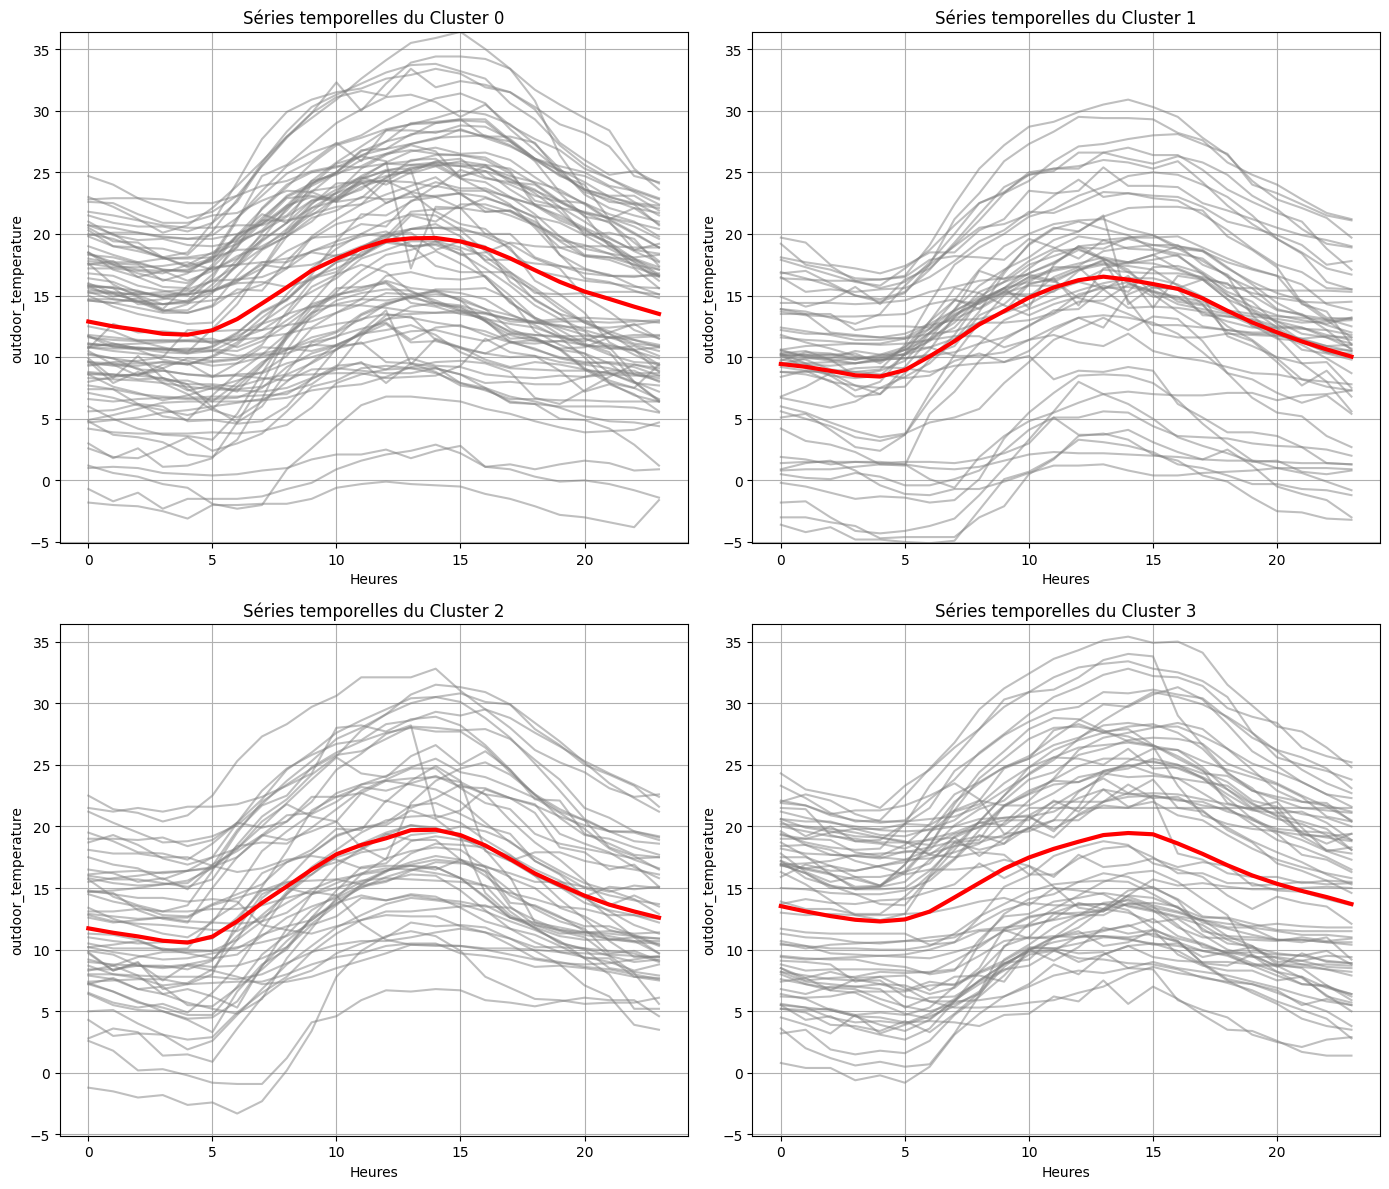

In [69]:
plot_clusters_single_variable(df_temp_out_heating, df_temp_out_heating["cluster"], column_index=0, y_label="outdoor_temperature")


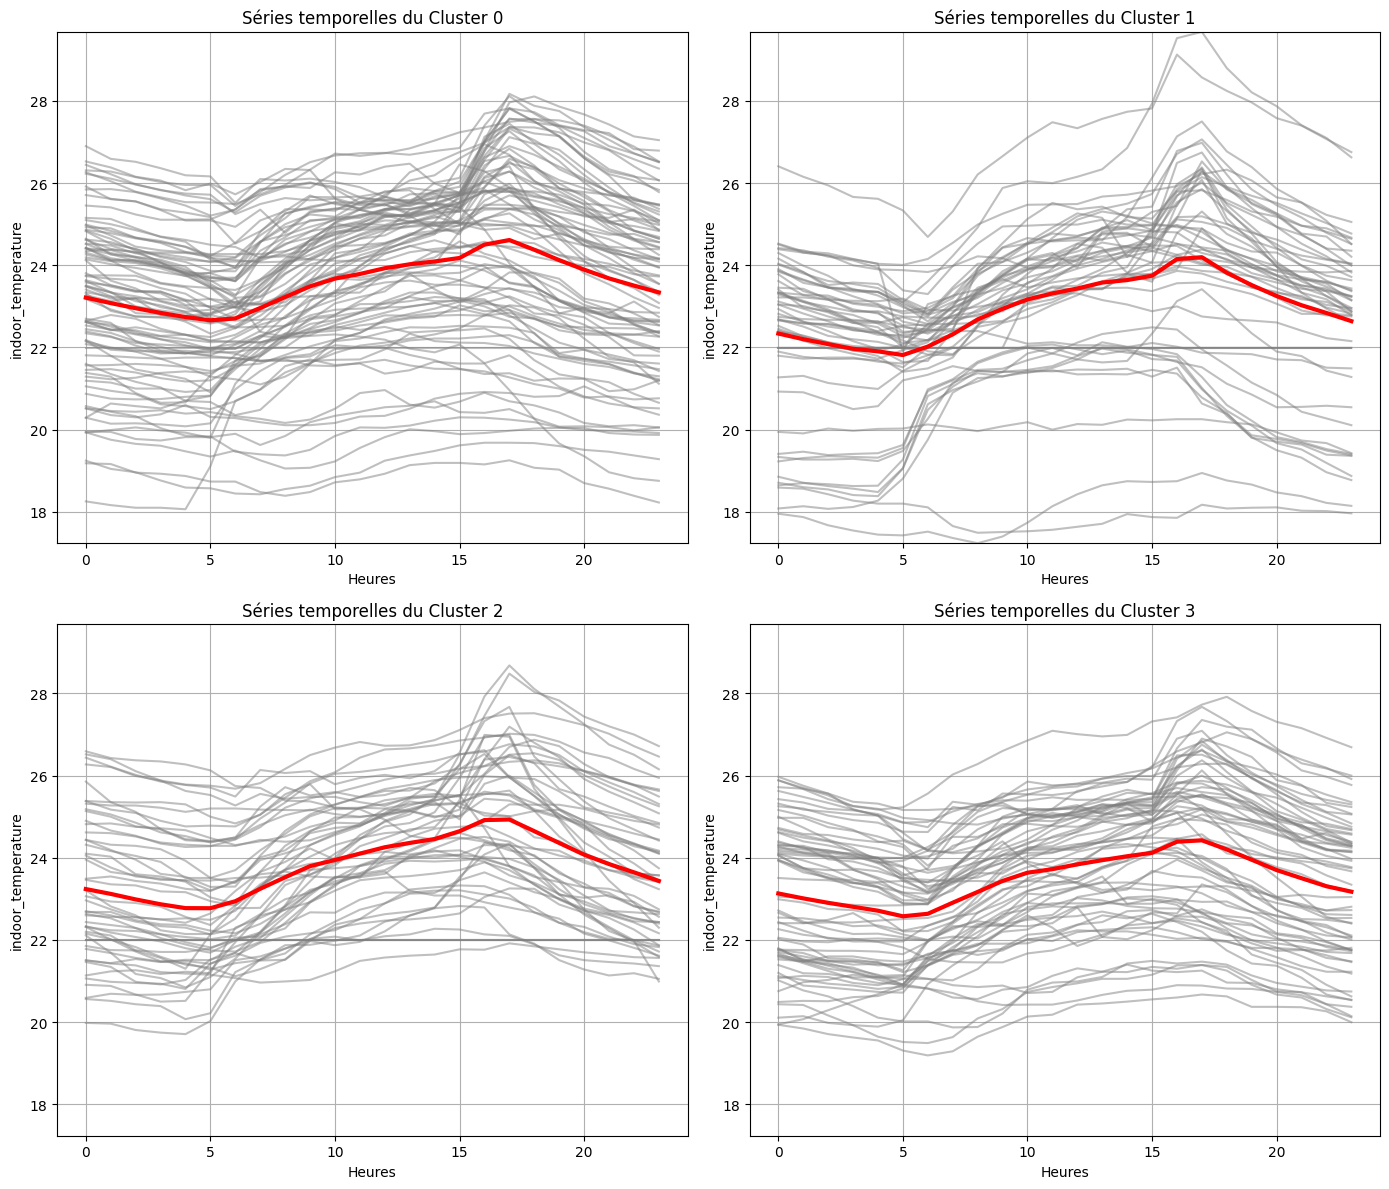

In [70]:
plot_clusters_single_variable(df_temp_in_heating, df_temp_in_heating["cluster"], column_index=0, y_label="indoor_temperature")


In [77]:

labels = df_median['cluster'] 
sil_score = silhouette_score(df_median2, labels, metric='euclidean')
db_score = davies_bouldin_score(df_median2, labels)

print(f"Davies-Bouldin Index: {db_score}")
print(f"Silhouette Score: {sil_score}")


Davies-Bouldin Index: 1.0590021824569937
Silhouette Score: 0.3184493335027493


In [73]:
print(df_heating.head(1))

                 Heure_1                Heure_2                Heure_3  \
0  [(0.5, 18.0818, 0.0)]  [(0.2, 18.1364, 0.0)]  [(0.1, 18.0727, 0.0)]   

                 Heure_4                Heure_5                   Heure_6  \
0  [(0.6, 18.1182, 0.0)]  [(0.3, 18.2727, 0.0)]  [(-0.4, 18.8091, 0.598)]   

                    Heure_7               Heure_8                  Heure_9  \
0  [(-0.4, 19.7545, 0.926)]  [(0.1, 20.9, 2.525)]  [(0.8, 21.2545, 1.891)]   

                 Heure_10  ...                 Heure_17  \
0  [(2.4, 21.2909, 0.56)]  ...  [(3.6, 21.5091, 0.318)]   

                  Heure_18               Heure_19               Heure_20  \
0  [(3.5, 20.6364, 0.001)]  [(3.4, 20.3818, 0.0)]  [(3.0, 19.8636, 0.0)]   

                Heure_21               Heure_22               Heure_23  \
0  [(2.8, 19.7727, 0.0)]  [(2.7, 19.6727, 0.0)]  [(2.5, 19.4909, 0.0)]   

                Heure_24       date cluster  
0  [(2.0, 19.3727, 0.0)] 2021-01-03       1  

[1 rows x 26 columns]


In [75]:
heating_dict = {}

for idx, row in df_heating.iterrows():
    heating_dict[idx] = {
        'date': row['date'],  
        'text': [],           
        'tint': [],           
        'heating': [],        
        'label': row['cluster']  
    }
    
    for col in df_heating.columns[:-2]:  
        for val in row[col]:
            heating_dict[idx]['text'].append(val[0])  
            heating_dict[idx]['tint'].append(val[1])   
            heating_dict[idx]['heating'].append(val[2]) 




{0: {'date': Timestamp('2021-01-03 00:00:00'), 'text': [0.5, 0.2, 0.1, 0.6, 0.3, -0.4, -0.4, 0.1, 0.8, 2.4, 4.1, 5.1, 5.1, 5.6, 5.5, 4.4, 3.6, 3.5, 3.4, 3.0, 2.8, 2.7, 2.5, 2.0], 'tint': [18.0818, 18.1364, 18.0727, 18.1182, 18.2727, 18.8091, 19.7545, 20.9, 21.2545, 21.2909, 21.4364, 21.4182, 21.4636, 21.4545, 21.4818, 21.2909, 21.5091, 20.6364, 20.3818, 19.8636, 19.7727, 19.6727, 19.4909, 19.3727], 'heating': [0.0, 0.0, 0.0, 0.0, 0.0, 0.598, 0.926, 2.525, 1.891, 0.56, 0.138, 0.036, 0.111, 0.134, 0.081, 0.109, 0.318, 0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'label': 1}, 1: {'date': Timestamp('2021-01-04 00:00:00'), 'text': [1.9, 1.7, 1.3, 1.5, 1.5, 1.3, 1.0, 0.9, 1.1, 1.6, 2.1, 2.3, 2.2, 2.2, 2.1, 2.0, 1.9, 1.7, 1.6, 1.6, 1.5, 1.4, 1.4, 1.3], 'tint': [19.3364, 19.2727, 19.2727, 19.2909, 19.2364, 19.4818, 20.2636, 21.1455, 21.3727, 21.3, 21.3909, 21.4455, 21.3455, 21.3545, 21.3455, 21.4545, 21.3636, 20.7818, 20.4091, 19.8, 19.7091, 19.6364, 19.3909, 19.3636], 'heating': [0.0, 0.0, 0.0, 0.0,

In [76]:
heating_df = pd.DataFrame(heating_dict)

print(heating_df)

                                                       0    \
date                                   2021-01-03 00:00:00   
text     [0.5, 0.2, 0.1, 0.6, 0.3, -0.4, -0.4, 0.1, 0.8...   
tint     [18.0818, 18.1364, 18.0727, 18.1182, 18.2727, ...   
heating  [0.0, 0.0, 0.0, 0.0, 0.0, 0.598, 0.926, 2.525,...   
label                                                    1   

                                                       1    \
date                                   2021-01-04 00:00:00   
text     [1.9, 1.7, 1.3, 1.5, 1.5, 1.3, 1.0, 0.9, 1.1, ...   
tint     [19.3364, 19.2727, 19.2727, 19.2909, 19.2364, ...   
heating  [0.0, 0.0, 0.0, 0.0, 0.0, 0.189, 0.694, 2.227,...   
label                                                    1   

                                                       2    \
date                                   2021-01-05 00:00:00   
text     [1.4, 1.5, 1.5, 1.5, 1.4, 1.5, 1.5, 1.4, 1.7, ...   
tint     [19.2273, 19.3091, 19.3545, 19.3364, 19.3182, ...   
heatin